$\newcommand{\TirName}[1]{\text{#1}}
\newcommand{\inferrule}[3][]{
  \let\and\qquad
  \begin{array}{@{}l@{}}
  \TirName{#1}
  \\
  \displaystyle
  \frac{#2}{#3}
  \end{array}
}
\newcommand{\infer}[3][]{\inferrule[#1]{#2}{#3}}
$

# 

<!-- 3 Expressions -->

<!-- 4 Binding and Scope -->

<!-- 8 Recursion -->

<!-- 9 Inductive Data Types -->

<!-- 11 Concrete Syntax -->

<!-- 12 Abstract Syntax and Parsing -->

<!-- 13 Exercise: Syntax -->

<!-- 14 Static Scoping -->

<!-- 15 Judgments -->

<!-- 16 Variables, Basic Values, and Judgments Lab -->

<!-- 18 Operational Semantics -->

<!-- 19 Functions and Dynamic Scoping -->

<!-- 20 Big-Step Exercise -->

<!-- 21 Evaluation Order  -->

<!-- 26 Static Type Checking -->

<!-- 27 Objects -->

<!-- 27 Static Type Checking Lab -->

<!-- 30 Mutable State -->

<!-- Encapsulating Effects Exercise -->

# Concrete Syntax

We have studied programming languages like Scala up to this point mostly
by example. At some point, we may wonder (1) what are all the Scala
programs that we can write, and (2) what do they mean? The answer to
question (1) is given by a definition of Scala’s *syntax*, while the
answer to question (2) is given by a definition of Scala’s *semantics*.

As a language designer, it is critical to us that we define
unambiguously the syntax and semantics so that everyone understands our
intent. Language users need to know what they can write and how the
programs they write will execute as alluded to in the previous
paragraph. Language implementers need to know what are the possible
input strings and what they mean in order to produce
*semantically-equivalent* output code.

## Concrete versus Abstract Syntax

Stated informally, the syntax of a language is concerned with the form
of programs, such as, the strings that we consider programs. The
semantics of a language is concerned with the meaning of programs, that
is, how programs evaluate. Because there an unbounded number of possible
programs in a language, we need tools to speak more abstractly about
them. Here, we focus on describing the syntax of programming languages.
We consider defining the semantics of programming languages
subsequently<span class="hidden">in
**?@sec-operational-semantics**</span>.

The *concrete syntax* of a programming language is concerned with how to
write down expressions, statements, and programs as strings. Concrete
syntax is the primary interface between the language user and the
language implementation. Thus, the design of concrete syntax focuses on
improving readability and perhaps writability for software developers.
There are significant sociological considerations, such as appealing to
tradition (e.g., using curly braces `{` $\ldots$ `}` to denote blocks of
statements). A large part of concrete syntax design is a human-computer
interaction problem, which is outside of what we can consider in this
course.

The *abstract syntax* of a programming language is the representation of
programs as trees (as in **?@sec-abstract-syntax-trees**) used by
language implementations and thus an important mental model for language
implementers and language users. We draw out the relationship between
concrete and abstract syntax here.

## Context-Free Grammars

Formal language theory considers the study of describing sets of strings
and the relative computational power of their recognizers called
*automata*. We consider the formalisms from formal language theory only
to the extent to be able to describe the syntax of a programming
language. In particular, we introduce *grammars* that are formalisms for
defining sets inductively.

A *formal language* $\mathcal{L}$ is a set of strings composed of
characters drawn from some *alphabet* $\Sigma$ (i.e.,
$\mathcal{L}\subseteq \Sigma^\ast$). A string in a language is sometimes
called a *sentence*.

The standard way to describe the concrete syntax of a language is using
*context-free grammars*. A context-free grammar is a way to describe a
class of languages called *context-free languages*. In formal language
theory, context-free languages are a proper superset of regular
languages, and context-free grammars are the notational analogue of
regular expressions.

A context-free grammar defines a language inductively and consists of
*terminals*, *non-terminals*, and *productions*. Terminals and
non-terminals are generically called *symbols*.

The terminals of a grammar correspond to the alphabet of the language
being defined and are the basic building blocks. Non-terminals are
defined via productions and conceptually recognize a sequence of symbols
belonging to a sub-language. A production has the form $$
N \mathrel{::=}\alpha
$$ where $N$ is a non-terminal from the set of non-terminals
$\mathcal{N}$ and $\alpha$ is a sequence of symbols (i.e.,
$\alpha \in (\Sigma \cup\mathcal{N})^\ast$). We write $\varepsilon$ for
the empty sequence. Note that $\mathrel{::=}$ is sometimes written using
different styles of arrows (e.g., $\rightarrow$).

A set of of productions with the same non-terminal, such as $$
\{ N \mathrel{::=}\alpha_1, \ldots, N \mathrel{::=}\alpha_n \}
$$ is usually written with one instance of the non-terminal and the
right-hand sides separated by $\mid$, such as $$
N \mathrel{::=}\alpha_1 \mid\cdots \mid\alpha_n
$$ Such a set of productions can be read informally as, “$N$ is
generated by either $\alpha_1$, $\ldots$, or $\alpha_n$.” For any
non-terminal $N$, we can talk about the language or *syntactic category*
defined by that non-terminal. This particular notation for context-free
grammars is often called BNF (for Backus-Naur Form).

As an example, let us consider defining a language of integers as
follows: $$\begin{array}{rrrl}
\text{integers} & i & \mathrel{::=}& \texttt{-}n \mid n
\\
\text{numbers}  & n & \mathrel{::=}& d \mid d\;n
\\
\text{digits}   & d & \mathrel{::=}&
  \texttt{0}
  \mid\texttt{1}
  \mid\texttt{2}
  \mid\texttt{3}
  \mid\texttt{4}
  \mid\texttt{5}
  \mid\texttt{6}
  \mid\texttt{7}
  \mid\texttt{8}
  \mid\texttt{9}
\end{array}$$ with the alphabet $$
\Sigma \stackrel{\text{\tiny def}}{=}\{ \texttt{0}, \texttt{1}, \texttt{2}, \texttt{3}, \texttt{4}, \texttt{5}, \texttt{6}, \texttt{7}, \texttt{8}, \texttt{9}, \texttt{-} \} \;.
$$ We identify the overall language by the *start non-terminal* (also
called the *start symbol*). By convention, we typically consider the
non-terminal listed first as the start non-terminal. Here, we have
strings like $\texttt{1}$, $\texttt{2}$, $\texttt{42}$, $\texttt{100}$,
and $\texttt{-7}$ in our language of integers. Note that strings like
$\texttt{012}$ and $\texttt{-0}$ are also in this language.

### Deriving a Sentence in a Grammar

Formally, a string is in the language described by a grammar if and only
if we can give a *grammar derivation* for it from the start symbol of
the grammar. We say a sequence of symbols $\beta$ is derived from
another sequence of symbols $\alpha$, written as $$\begin{array}{lcl}
\alpha & \Longrightarrow& \beta
\end{array}$$ when $\beta$ is obtained by replacing a non-terminal $N$
in $\alpha$ with the right-hand side of a production of $N$. We can give
a witness that a string $s$ belongs to a language by showing derivation
steps from the start symbol to the string $s$. For example, we show that
is in the language of integers defined above: $$\begin{array}{lcl}
i & \Longrightarrow& n \\
  & \Longrightarrow& d\;n \\
  & \Longrightarrow& \texttt{0}\;n \\
  & \Longrightarrow& \texttt{0}\;d\;n \\
  & \Longrightarrow& \texttt{01}\;n \\
  & \Longrightarrow& \texttt{01}\;d \\
  & \Longrightarrow& \texttt{012}
\end{array}$$ In the above, we have shown a *leftmost derivation*, that
is, one where we always choose to expand the leftmost non-terminal. We
can similarly define a *rightmost derivation*. Note that there are
typically several derivations that witness a string belonging the
language described by a grammar.

We can now state precisely the language described by a grammar. Let
$\mathcal{L}(G)$ be the language described by grammar $G$ over the
alphabet $\Sigma$, start symbol $S$, and derivation relation
$\Longrightarrow$. We define the relation
$\alpha \Longrightarrow^\ast \beta$ as holding if and only if $\beta$
can be derived from $\alpha$ with the one-step derivation relation
$\Longrightarrow$ in zero or more steps (i.e., $\Longrightarrow^\ast$ is
the reflexive-transitive closure of $\Longrightarrow$). Then,
$\mathcal{L}(G)$ is defined as follows: $$
\mathcal{L}(G) \stackrel{\text{\tiny def}}{=}\left\{ \,s \,\left|\vphantom{s\text{$s \in \Sigma^\ast$ and $S \Longrightarrow^\ast s$}}\right.\, \text{$s \in \Sigma^\ast$ and $S \Longrightarrow^\ast s$}\, \right\} \;.
$$

### Lexical and Syntactic

In language implementations, we often want to separate the simple
grouping of characters from the identification of structure. For
example, when we read the string $\texttt{23 + 45}$, we would normally
see three pieces: the number twenty-three, the plus operator, and the
number forty-five, rather than the literal sequence of characters
‘$\texttt{2}$’, ‘$\texttt{3}$’, ‘$\;\;$’, ‘$\texttt{+}$’, ‘$\;\;$’,
‘$\texttt{4}$’, and ‘$\texttt{5}$’.

Thus, it is common to specify the *lexical* structure of a language
separately from the *syntactic* structure. The lexical structure is this
simple grouping of characters, which is often specified using regular
expressions. A *lexer* transforms a sequence of literal characters into
a sequence of *lexemes* classified into *tokens*. For example, a lexer
might transform the string $\texttt{"23 + 45"}$ into the following
sequence: $$
\mathit{num}(\texttt{"23"}), \texttt{+}, \mathit{num}(\texttt{"45"})
$$ consisting of three tokens: a $\mathit{num}$ token with lexeme
$\texttt{"23"}$, a plus token with lexeme $\texttt{"+"}$, and a
$\mathit{num}$ token with lexeme $\texttt{"45"}$. Since there is only
one possible lexeme for the plus token, we abuse notation slightly and
name the token by the lexeme. A lexer is also sometimes called a
*scanner*.

A *parser* then recognizes strings of tokens, typically specified using
context-free grammars. For example, we might define a language of
expressions with numbers and the plus operator: $$\begin{array}{rrrl}
  \text{expressions} & \mathit{expr}& \mathrel{::=}& \mathit{num}\mid\mathit{expr}\;\texttt{+}\;\mathit{expr}
\end{array}$$ Note that $\mathit{num}$ is a terminal in this grammar.

There is an analogy to parsing sentences in natural languages. Grouping
letters into words in a sentence corresponds essentially to lexing,
while classifying words into grammatical elements (e.g., nouns, verbs,
noun phrases, verb phrases) corresponds to parsing.

As context-free languages include regular languages, one can also define
parsers without lexers, typically called *lexer-less parsers* or
*scanner-less parsers*.

### Ambiguous Grammars

Consider the following arithmetic expression: $$
\texttt{100 / 10 / 5}
$$ Should it be read as $(\texttt{100 / 10}) \texttt{ / } \texttt{5}$ or
$\texttt{100} \texttt{ / } (\texttt{10 / 5})$? The former evaluates to
$\texttt{2}$, while the latter evaluates to $\texttt{50}$. In
mathematics, we adopt conventions that, for example, choosing the former
over the latter.

#### Associativity

Now consider a language implementation that is given the following
input: $$
\texttt{100 / 10 / 5}
$$ Which reading should it take? In particular, consider the grammar
$$\begin{array}{rrrl}
  \text{expressions} & e & \mathrel{::=}& n \mid e \; \texttt{/} \; e
\end{array}$$ where $n$ is the terminal for numbers.

We can diagram the two ways of reading the string
‘$\texttt{100 / 10 / 5}$’ as shown in
<a href="#fig-ambiguous-grammar-parse-tree-a"
class="quarto-xref">Figure 1 (a)</a>
and <a href="#fig-ambiguous-grammar-parse-tree-b"
class="quarto-xref">Figure 1 (b)</a> where we write the lexemes for the
$n$ tokens in parentheses for clarity.

<table>
<colgroup>
<col style="width: 47%" />
<col style="width: 5%" />
<col style="width: 47%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: left;"><div width="47.4%"
data-layout-align="left">
<figure id="fig-ambiguous-grammar-parse-tree-a">
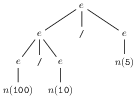
<figcaption>(a) The left-associative parse tree corresponding to <span
class="math inline">(<code>100 / 10</code>)<code> / </code><code>5</code></span>.</figcaption>
</figure>
</div></td>
<td style="text-align: left;"><div class="quarto-figure-spacer"
width="5.3%" data-layout-align="left">
<p> </p>
</div></td>
<td style="text-align: left;"><div width="47.4%"
data-layout-align="left">
<figure id="fig-ambiguous-grammar-parse-tree-b">
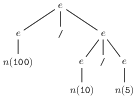
<figcaption>(b) The right-associative parse tree corresponding to <span
class="math inline"><code>100</code><code> / </code>(<code>10 / 5</code>)</span>.</figcaption>
</figure>
</div></td>
</tr>
</tbody>
</table>

Figure 1: An ambiguous grammar is exhibited by two parse trees for a
string in the language described by the grammar.

These diagrams are called *parse trees*, and they are another way to
demonstrate that a string is the language described by a grammar. In a
parse tree, a parent node corresponds to a non-terminal where its
children correspond to the sequence of symbols in a production of that
non-terminal. Parse trees capture syntactic structure and distinguishes
between the two ways of “reading” ‘$\texttt{100 / 10 / 5}$’. We call the
grammar given above *ambiguous* because we can witness a string that is
“read” in two ways by giving two parse trees for it. Note that the
parentheses $(\ldots)$ in the captions are not part of sentences of the
grammar but rather at the meta-level to convey the particular parse
tree.

In this way, a parse tree can be viewed as recognizing a string by a
grammar in a “bottom-up manner.” In contrast, derivations intuitively
capture generating strings described a grammar in a “top-down manner.”

Can we rewrite the above grammar to make it unambiguous? That is, can we
rewrite the above grammar such that the set of strings accepted by the
grammar is the same but is also unambiguous.

Yes, we can rewrite the above grammar in two ways to eliminate ambiguity
as shown in <a href="#tbl-grammar-eliminate-ambiguity"
class="quarto-xref">Table 1</a>. One grammar is *left recursive*, that
is, the production $$
e \mathrel{::=}e\;\texttt{/}\;n
$$ is recursive only on the left of the binary operator token
$\texttt{/}$. Analogously, we can write a *right recursive* grammar that
accepts the same strings.

| Ambiguous | Unambiguous |  |
|:--:|:--:|:--:|
|  | Left-Recursive | Right-Recursive |
| $e ::= n \mid e \; \texttt{/} \; e$ | $e ::= n \mid e \; \texttt{/} \; n$ | $e ::= n \mid n \; \texttt{/} \; e$ |

Table 1: Rewriting a grammar to eliminate ambiguity with respect to
associativity.

Intuitively, these grammars enforce a particular linearization of the
possible parse trees: either to the left or to the right as shown in
<a href="#fig-associativity" class="quarto-xref">Figure 2</a>. As a
terminological shorthand, we say that a binary operator is *left
associative* to mean that expression trees involving that operator are
linearized to the left, as in
<a href="#fig-ambiguous-grammar-left-parse-tree"
class="quarto-xref">Figure 2 (a)</a>. Analogously, a binary operator is
*right associative* means expression trees involving that operator are
linearized to the right, as in
<a href="#fig-ambiguous-grammar-right-parse-tree"
class="quarto-xref">Figure 2 (b)</a>.

<table>
<colgroup>
<col style="width: 47%" />
<col style="width: 5%" />
<col style="width: 47%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: left;"><div width="47.4%"
data-layout-align="left">
<figure id="fig-ambiguous-grammar-left-parse-tree">
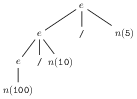
<figcaption>(a) The one possible parse tree for <span
class="math inline"><code>100 / 10 / 5</code></span> corresponding to
the left-recursive grammar in <a href="#tbl-grammar-eliminate-ambiguity"
class="quarto-xref">Table 1</a>.</figcaption>
</figure>
</div></td>
<td style="text-align: left;"><div class="quarto-figure-spacer"
width="5.3%" data-layout-align="left">
<p> </p>
</div></td>
<td style="text-align: left;"><div width="47.4%"
data-layout-align="left">
<figure id="fig-ambiguous-grammar-right-parse-tree">
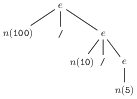
<figcaption>(b) The one possible parse tree for <span
class="math inline"><code>100 / 10 / 5</code></span> corresponding to
the right-recursive grammar in <a
href="#tbl-grammar-eliminate-ambiguity"
class="quarto-xref">Table 1</a>.</figcaption>
</figure>
</div></td>
</tr>
</tbody>
</table>

Figure 2: Grammars that enforce a particular associativity.

#### Precedence

A related syntactic issue appears when we consider multiple operators,
such as the ambiguous grammar in
<a href="#tbl-grammar-precedence" class="quarto-xref">Table 2</a>.

| Ambiguous | Unambiguous |
|:-------------------------------:|:-------------------------------------:|
| $\begin{array}{rrrl} \text{expressions} & e & \mathrel{::=}& n \mid e\;\texttt{/}\;e \mid e\;\texttt{-}\;e \end{array}$ | $\begin{array}{rrrl} \text{expressions} & e & \mathrel{::=}& f \mid e\;\texttt{-}\;f \\ \text{factors} & f & \mathrel{::=}& n \mid f\;\texttt{/}\;n \end{array}$ |

Table 2: Rewriting a grammar to eliminate ambiguity and enforce a
particular associativity and precedence. Both operators are left
associative and the operator has higher precedence than .

For example, the string $$
\texttt{10 - 10 / 10}
$$ has two parse trees corresponding to the following two readings: $$
(\texttt{10 - 10}) \texttt{ / } \texttt{10} \qquad\text{or}\qquad \texttt{10} \texttt{ - } (\texttt{10 / 10})
$$ We may want to enforce that the $\texttt{/}$ operator “binds
tighter,” that is, has *higher precedence* than the $\texttt{-}$
operator, which corresponds to the reading on the right. To enforce the
desired precedence, we can refactor the ambiguous grammar into the
unambiguous one shown in
<a href="#tbl-grammar-precedence" class="quarto-xref">Table 2</a>. We
layer the grammar by introducing a new non-terminal $f$ that describes
expressions with only $\texttt{/}$ operators. The non-terminal $f$ is
left recursive, so we enforce that $\texttt{/}$ is left associative. The
start non-terminal $e$ can be either an $f$ or an expression with a
$\texttt{-}$ operator.

Intuitively from a top-down, derivation perspective, once
$e \Longrightarrow f$, then there is no way to derive a $\texttt{-}$
operator. Thus, in any parse tree for a string that includes both
$\texttt{-}$ and $\texttt{/}$ operators, the $\texttt{-}$ operators must
be “higher” in the tree. Note that *higher precedence* means “binding
tighter” or “lower in the parse tree,” and similarly, *lower precedence*
means “binding looser” or “higher in the parse tree.”

#### Syntactic and Semantic

An important observation is that ambiguity is a syntactic concern: which
tree do we get when we parse a string? This concern is different than
and distinct with respect to what do the $\texttt{/}$ or the
$\texttt{-}$ operators mean (e.g., perhaps division and subtraction),
that is, the *semantics* of our expression language or to what *value*
does an expression *evaluate*. The issue is the same if we consider a
language with a pair operators that have a less ingrained meaning, such
as $\texttt{@}$ and $\texttt{\#}$.

If we know semantics of the language, then we can sometimes probe to
determine associativity or precedence. For example, let us suppose we
are interested in seeing what is relative precedence of the `/` and `-`
operators in Scala. Knowing that `/` means division and `-` means
subtraction, then observing the value of the expression `10 - 10 / 10`
tells us the relative precedence of these two operators. Specifically,
if the value is `9`, then `/` has higher precedence, but if the value is
`0`, then `-` has higher precedence:

In [2]:
10 - 10 / 10

res0 : Int = 9